# Autoregressive Moving Average (ARMA): Artificial data

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(12345)

Generate some data from an ARMA process:

In [3]:
arparams = np.array([0.75, -0.25])
maparams = np.array([0.65, 0.35])

The conventions of the arma_generate function require that we specify a 1 for the zero-lag of the AR and MA parameters and that the AR parameters be negated.

In [4]:
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

 Now, optionally, we can add some dates information. For this example, we'll use a pandas time series.

In [5]:
dates = pd.date_range("1980-1-1", freq="M", periods=nobs)
y = pd.Series(y, index=dates)
arma_mod = ARIMA(y, order=(2, 0, 2), trend="n")
arma_res = arma_mod.fit()

In [6]:
print(arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -353.445
Date:                Wed, 17 May 2023   AIC                            716.891
Time:                        23:45:30   BIC                            734.498
Sample:                    01-31-1980   HQIC                           723.977
                         - 10-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7905      0.142      5.566      0.000       0.512       1.069
ar.L2         -0.2314      0.124     -1.859      0.063      -0.475       0.013
ma.L1          0.7007      0.131      5.344      0.0

In [7]:
y.tail()

2000-06-30    0.173211
2000-07-31   -0.048325
2000-08-31   -0.415804
2000-09-30    0.338725
2000-10-31    0.360838
Freq: M, dtype: float64

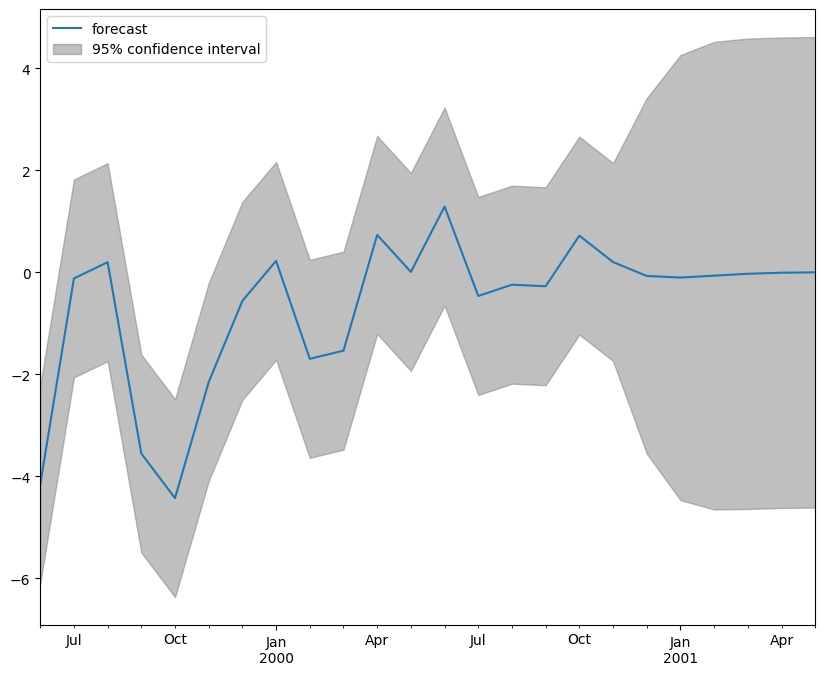

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(arma_res, start="1999-06-30", end="2001-05-31", ax=ax)
legend = ax.legend(loc="upper left")